In [110]:
import numpy as np
import cv2
import os
import io
from IPython.display import clear_output, Image, display
import PIL.Image

7d


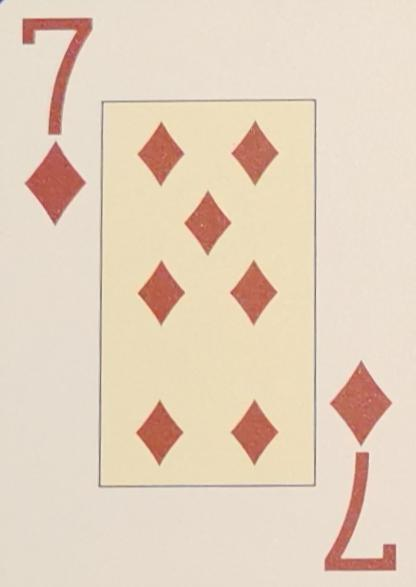

8d


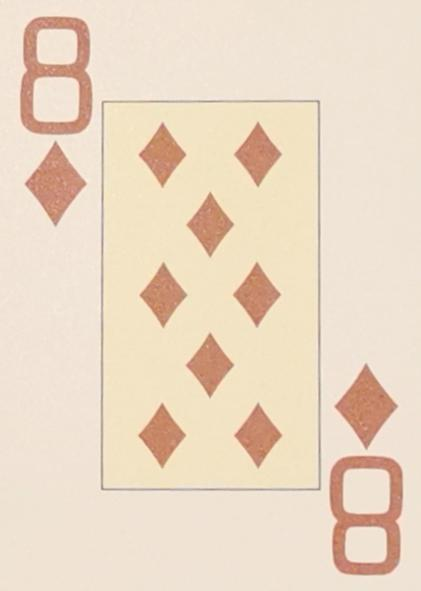

Qc


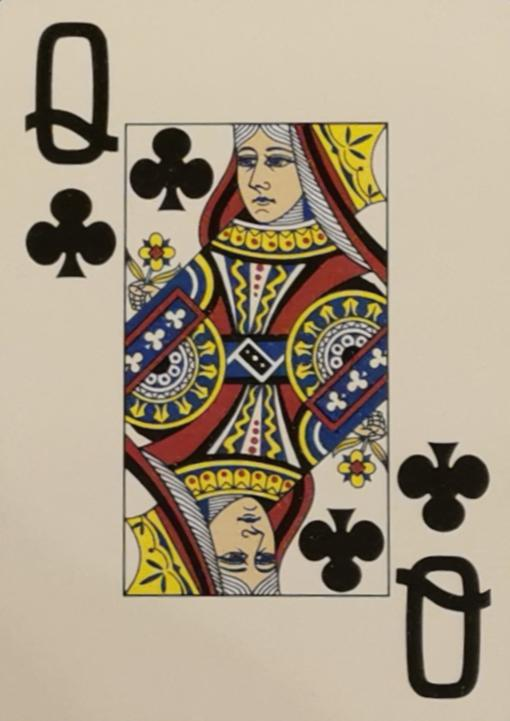

Kc


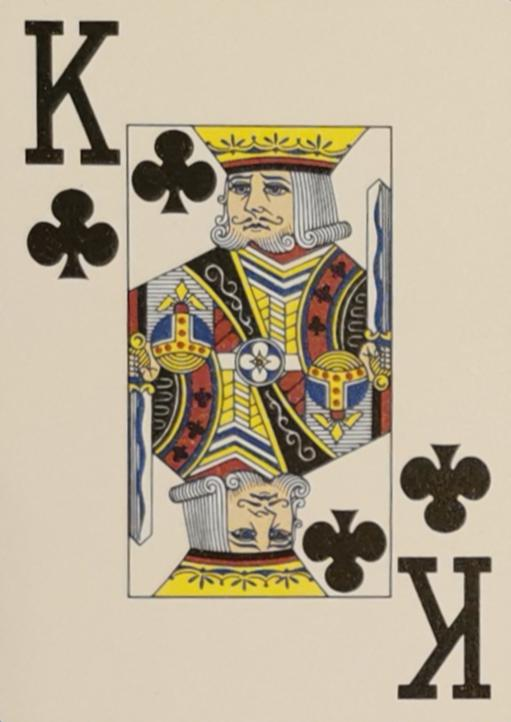

Ad


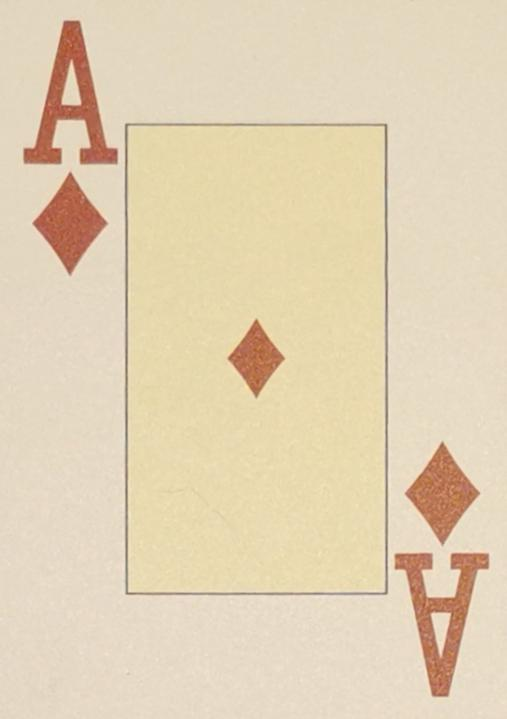

2d


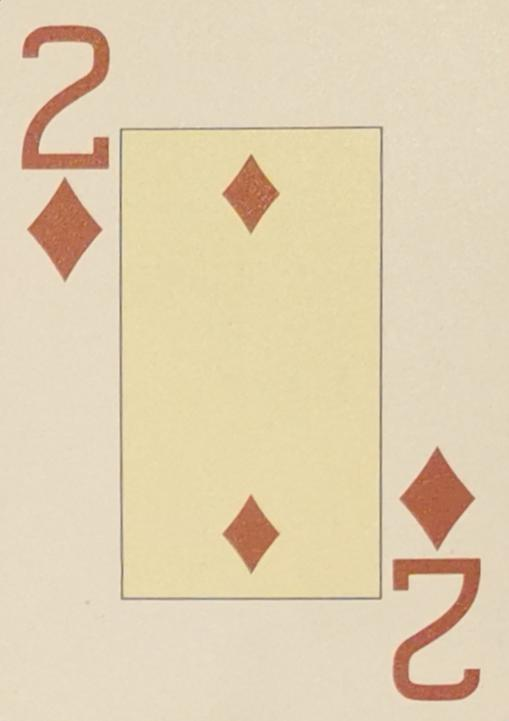

3d


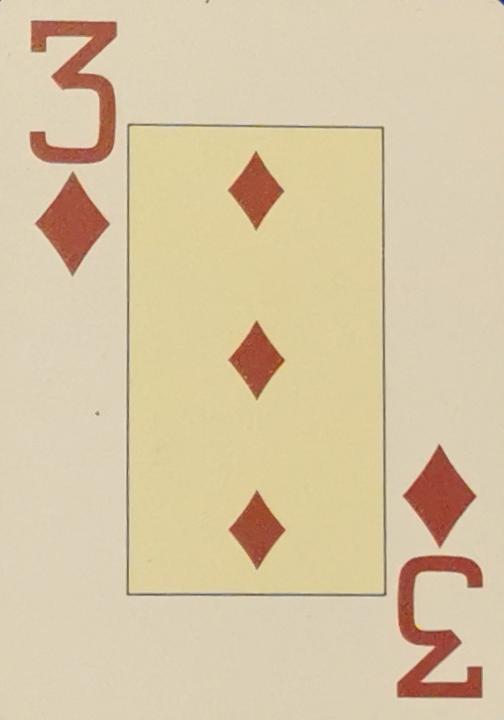

4d


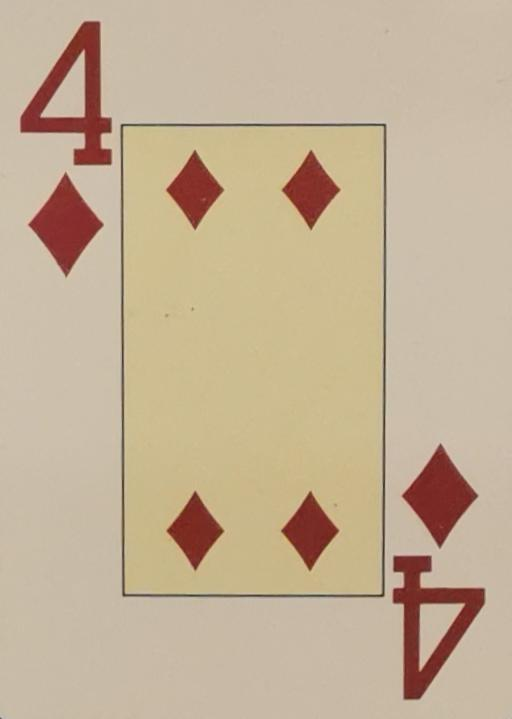

5d


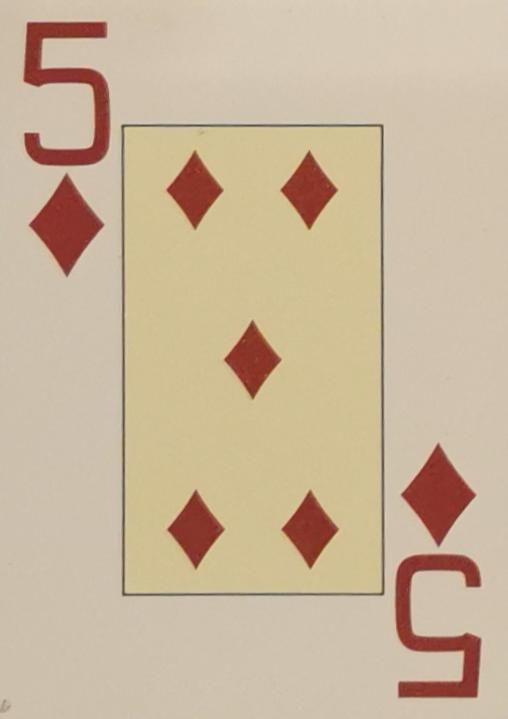

6d


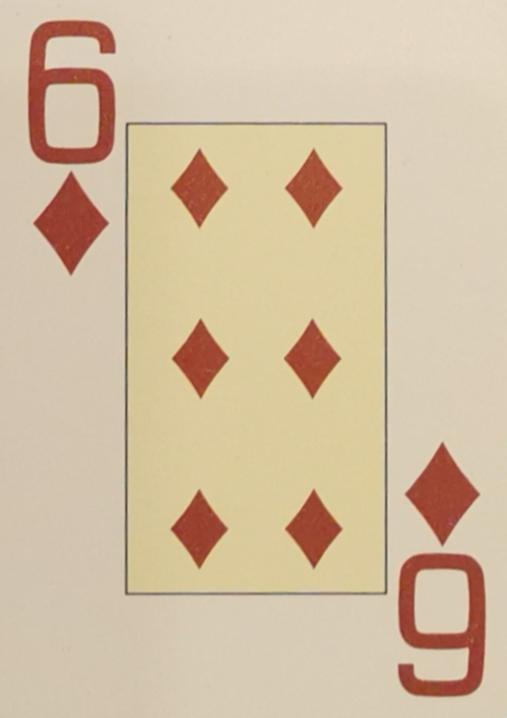

Ah


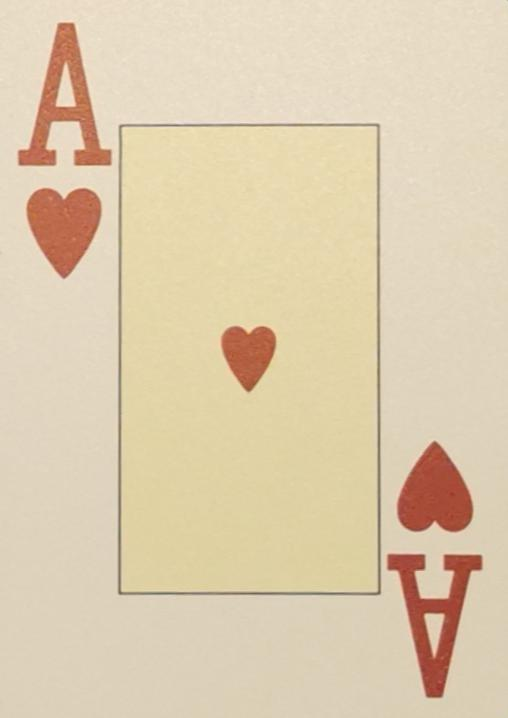

Ks


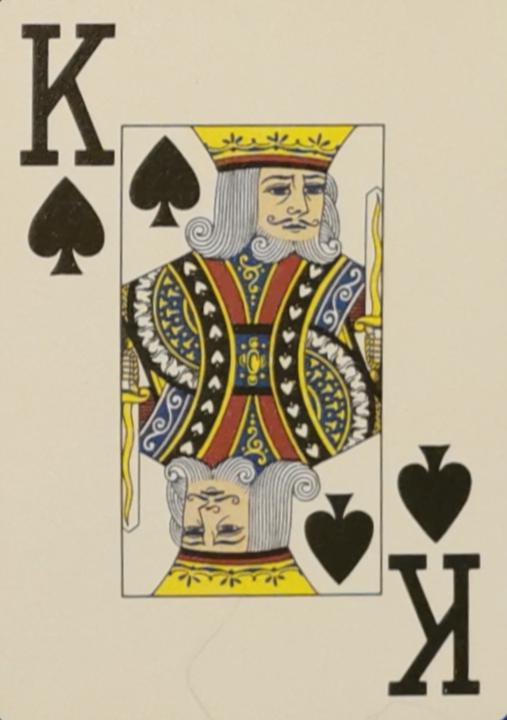

Jc


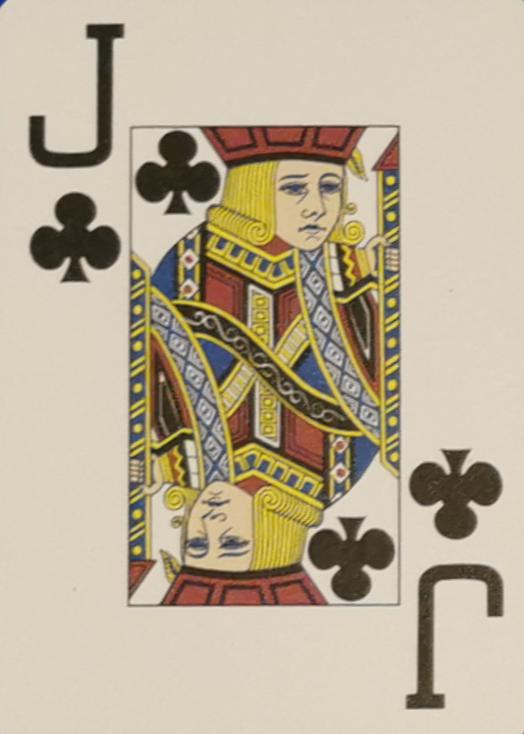

10c


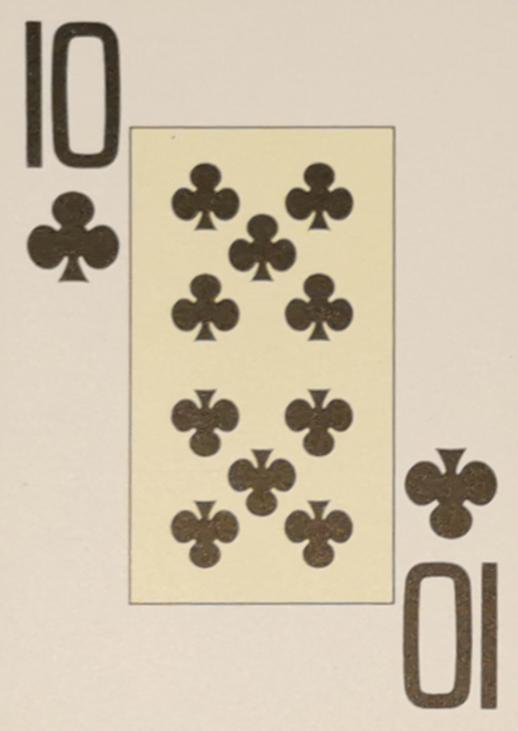

9c


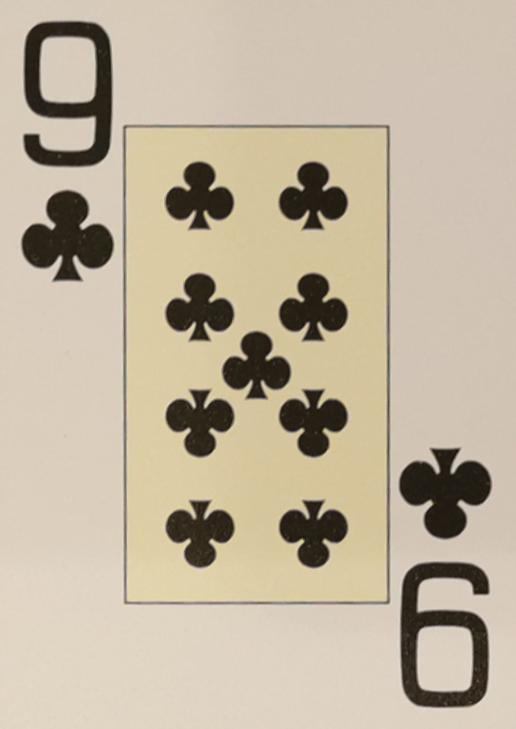

8c


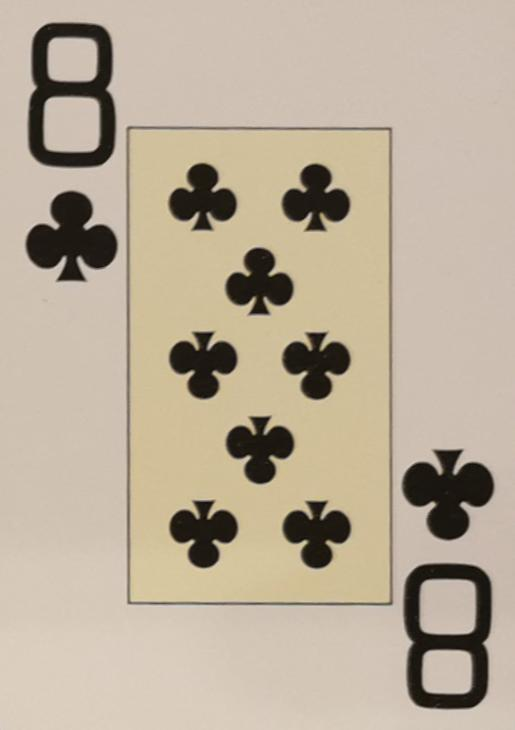

7c


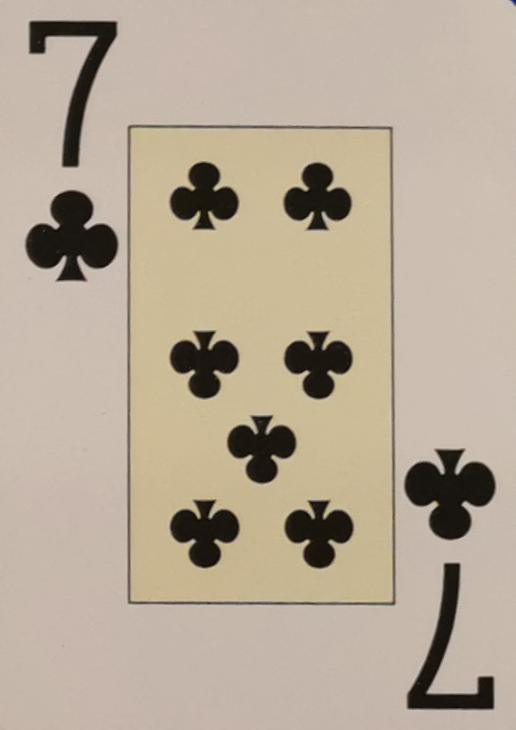

6c


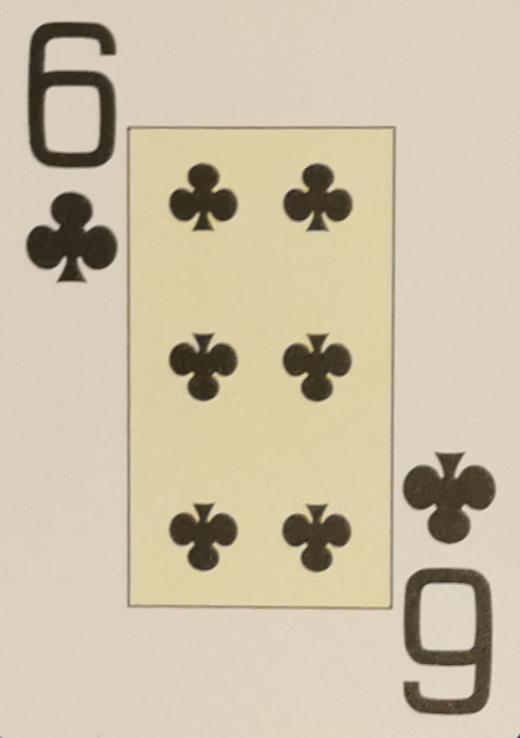

5c


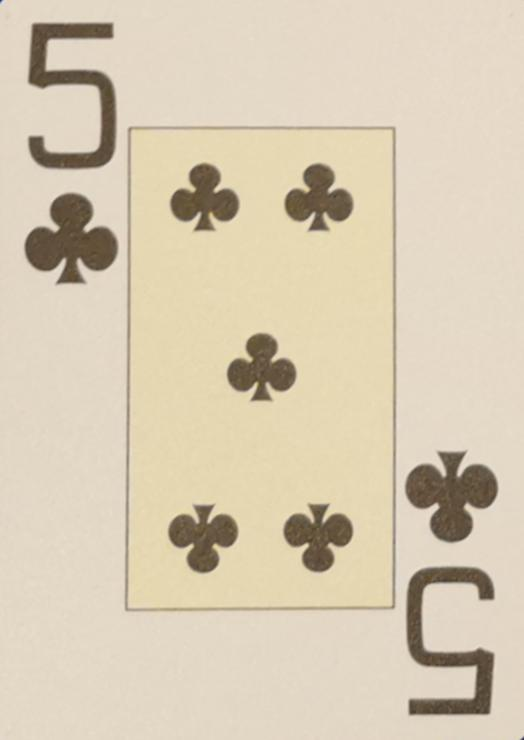

4c


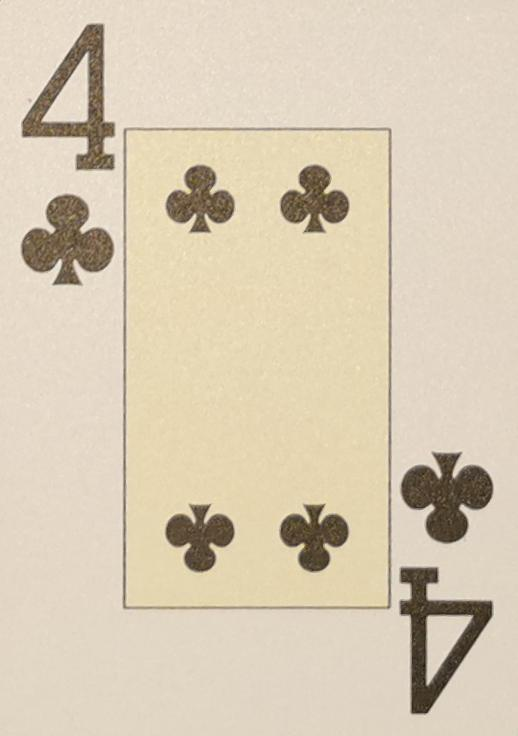

3c


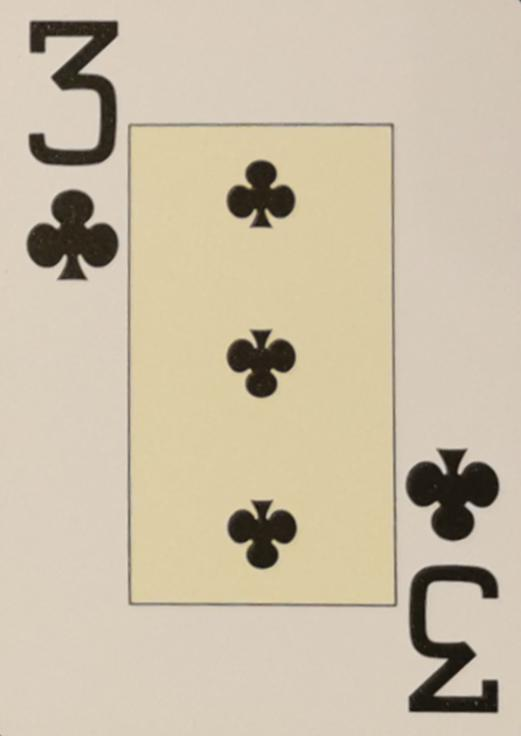

2c


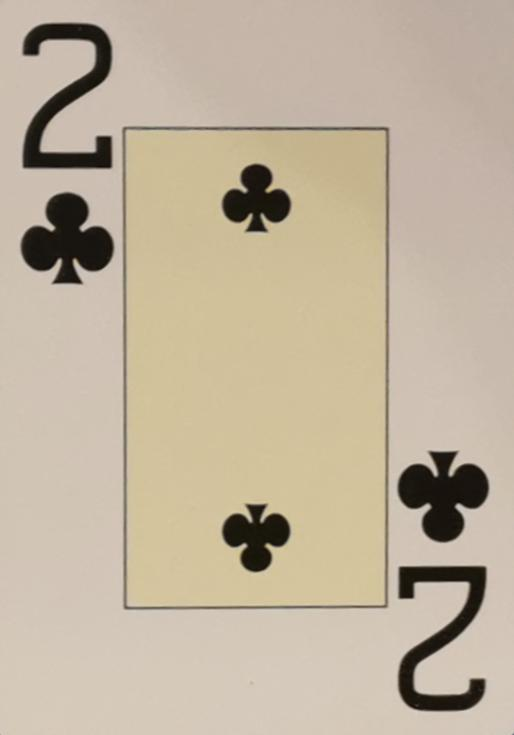

5h


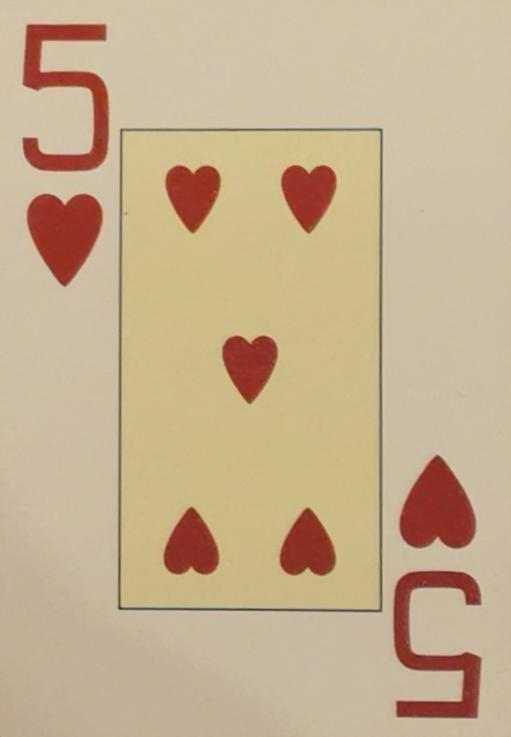

6h


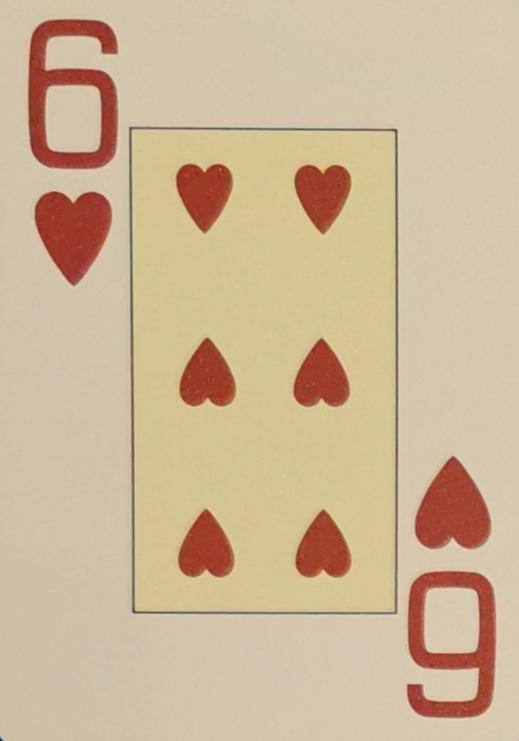

7h


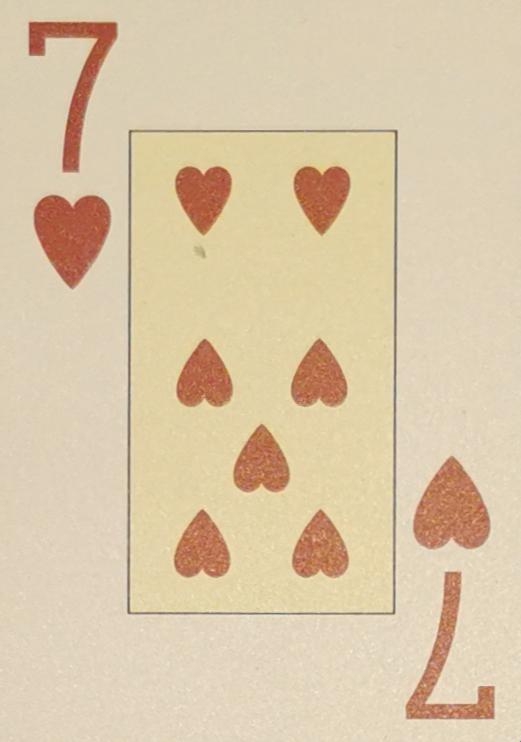

8h


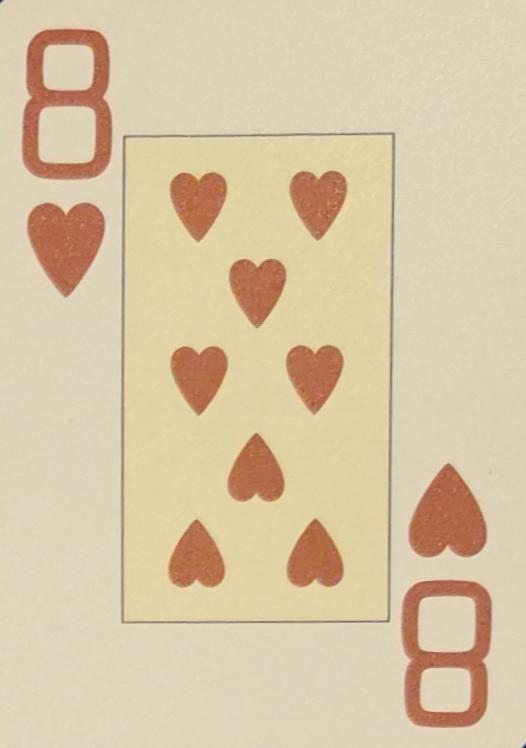

9h


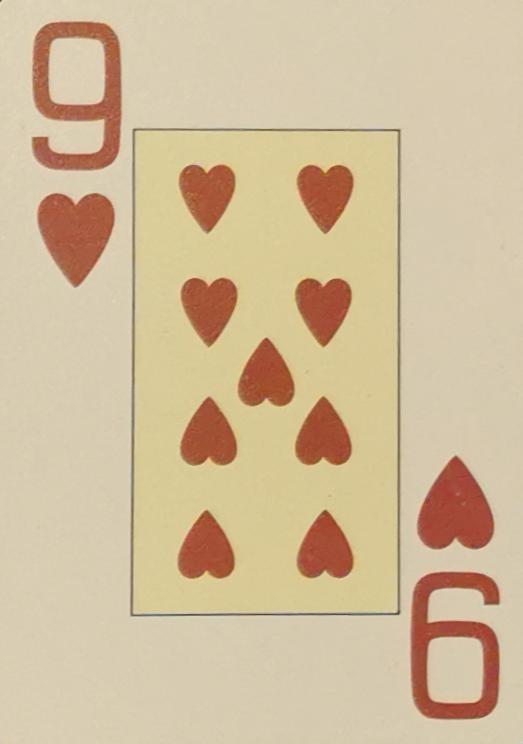

10h


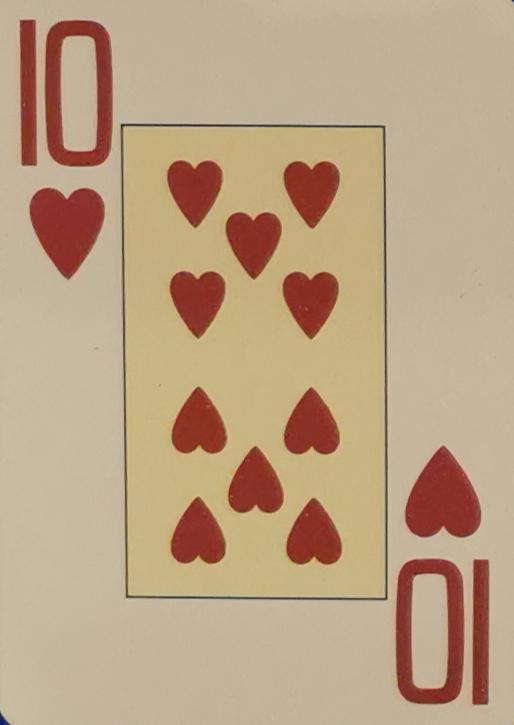

Jh


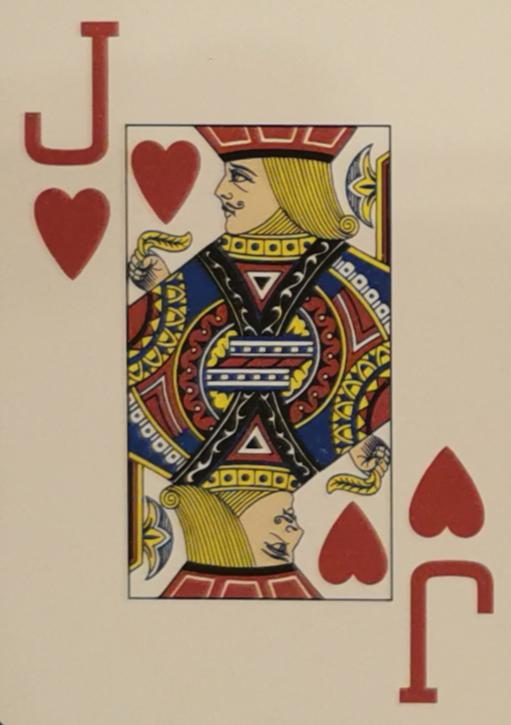

Qh


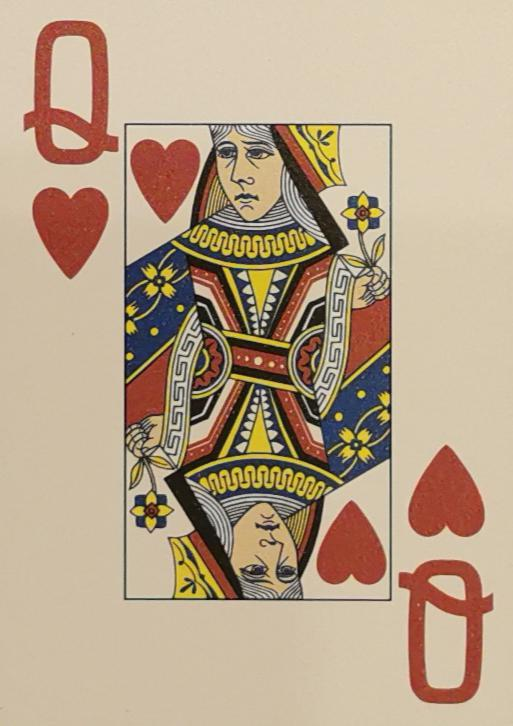

Kh


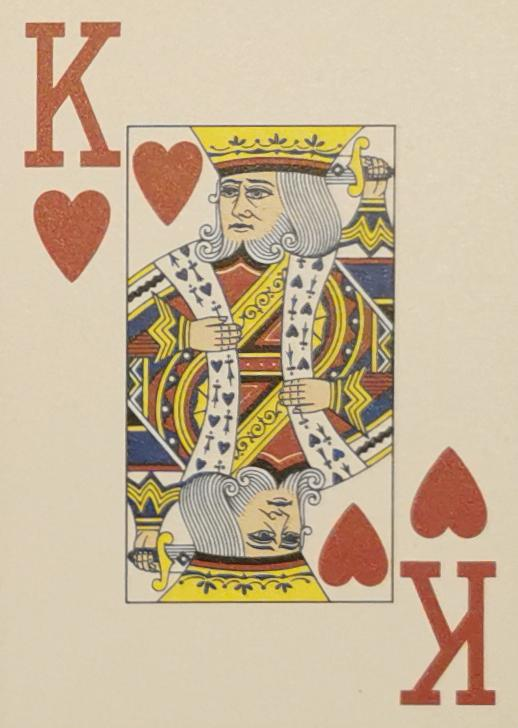

Ac


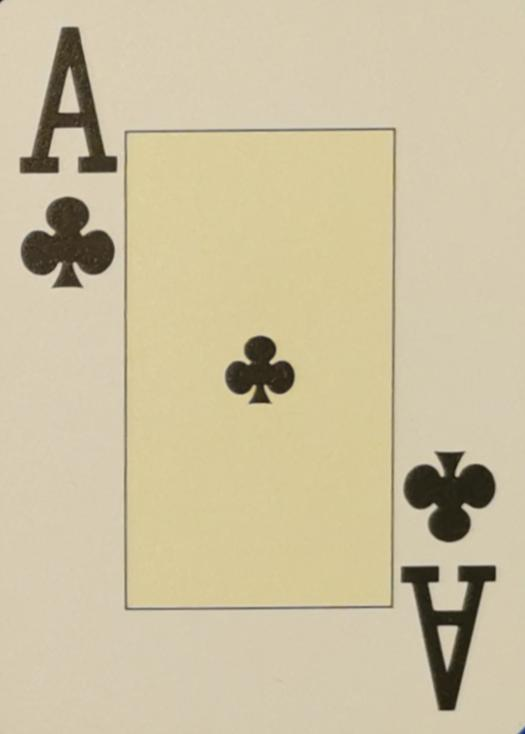

6s


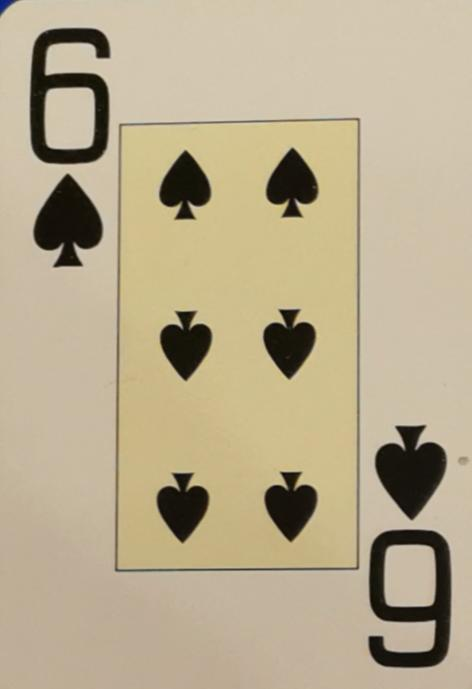

7s


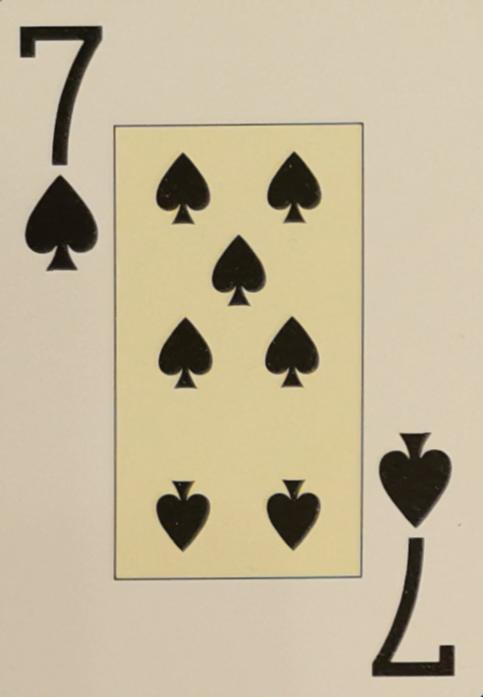

8s


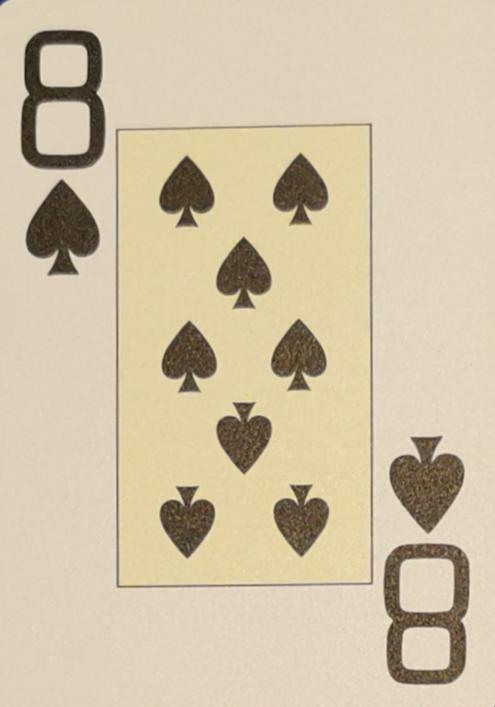

9s


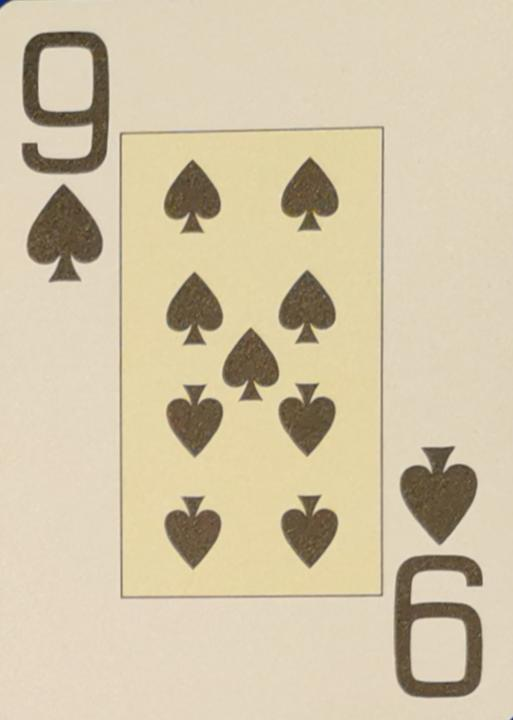

10s


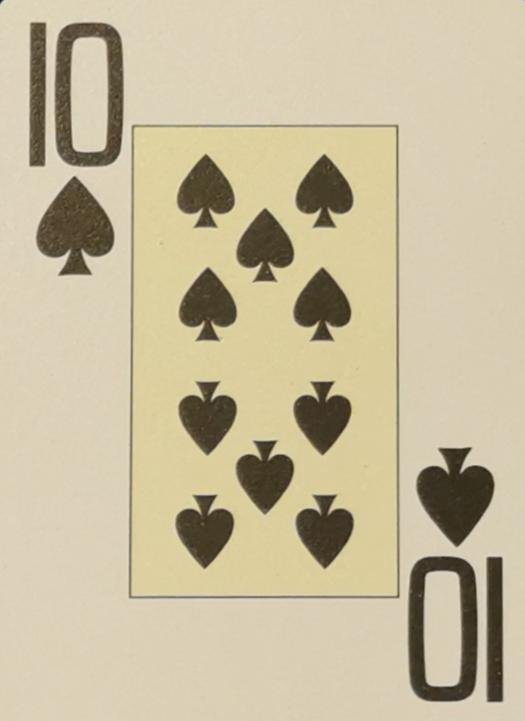

Js


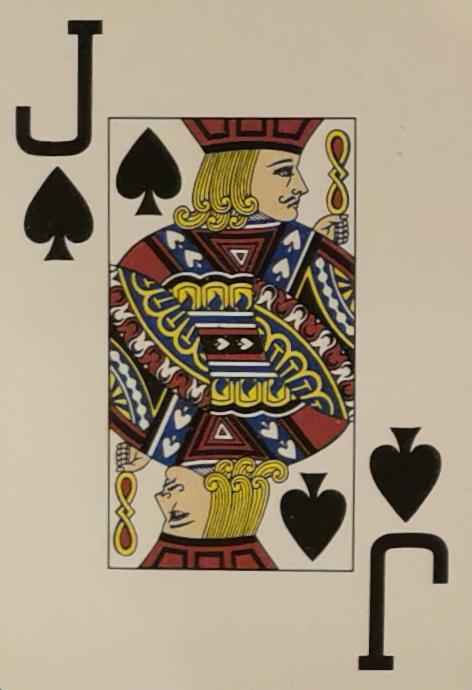

Qs


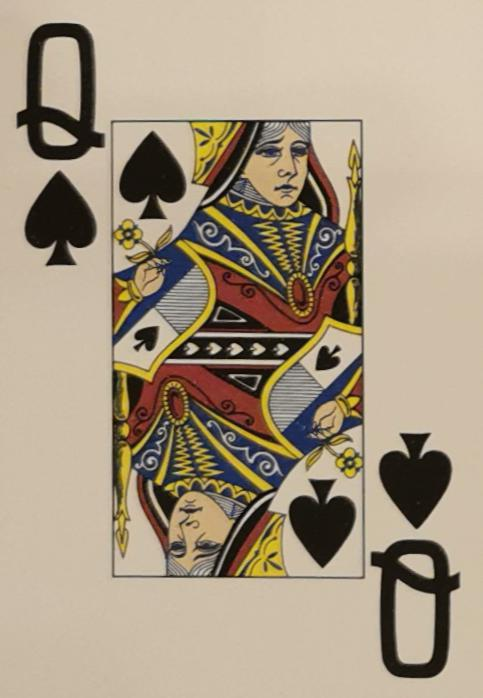

2h


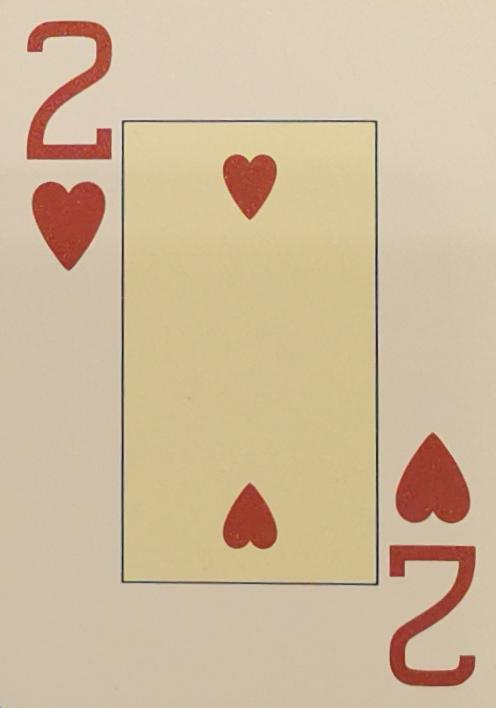

3h


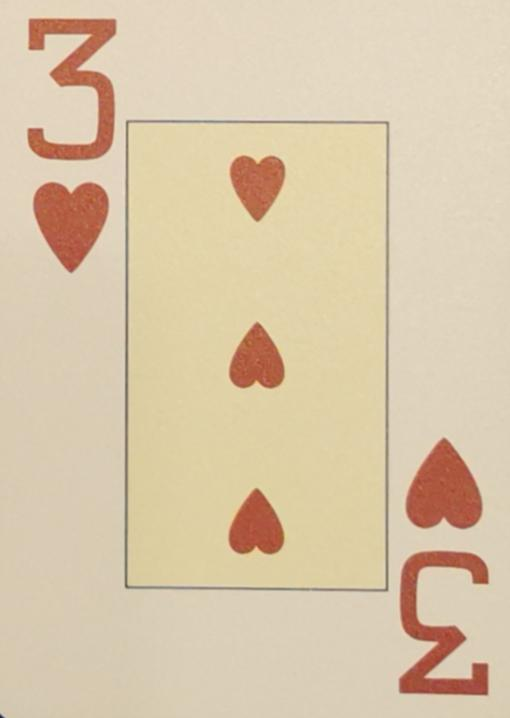

4h


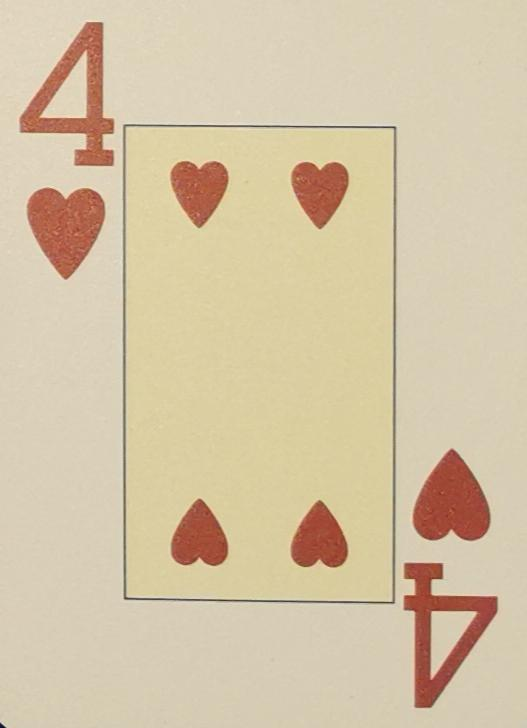

9d


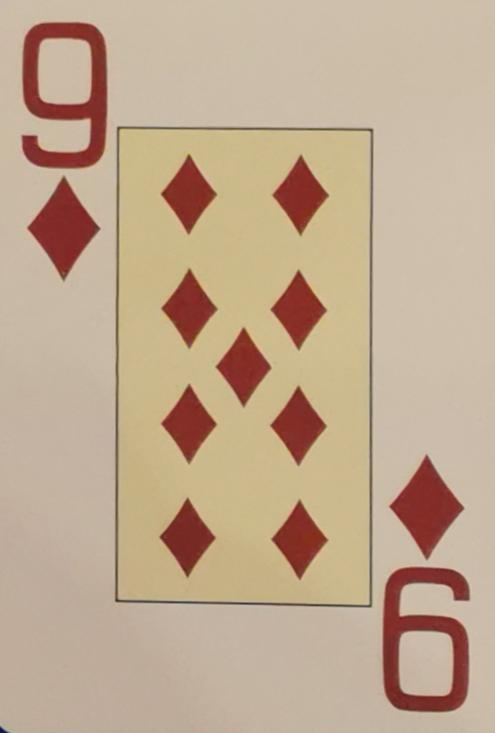

10d


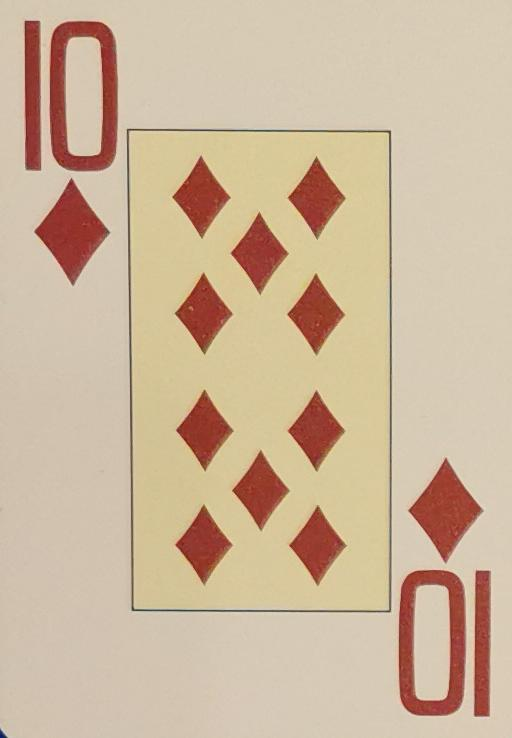

Jd


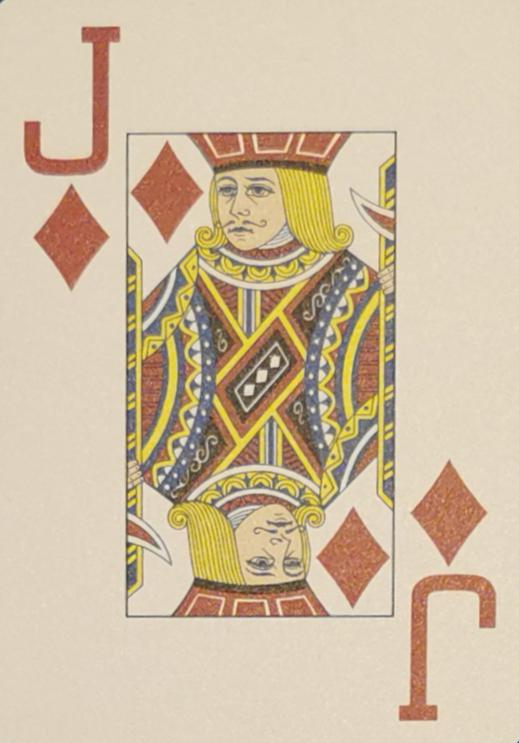

Qd


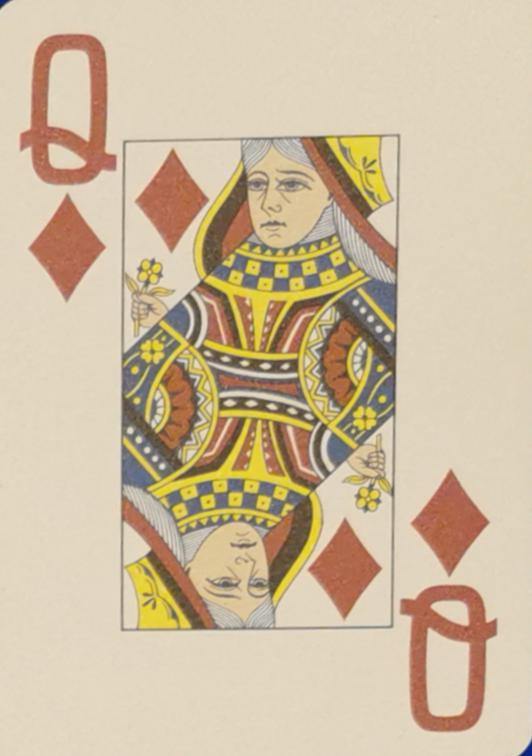

Kd


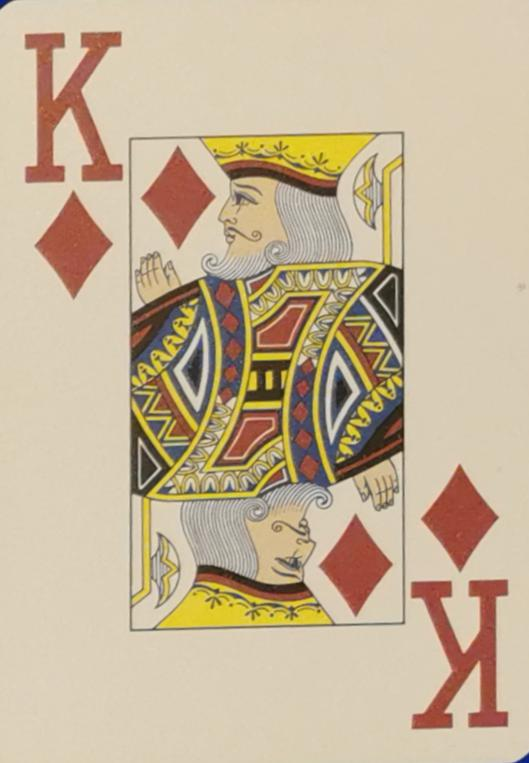

As


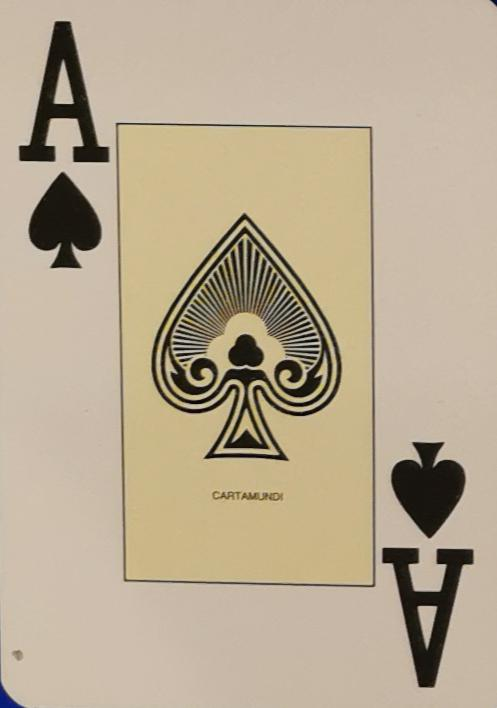

2s


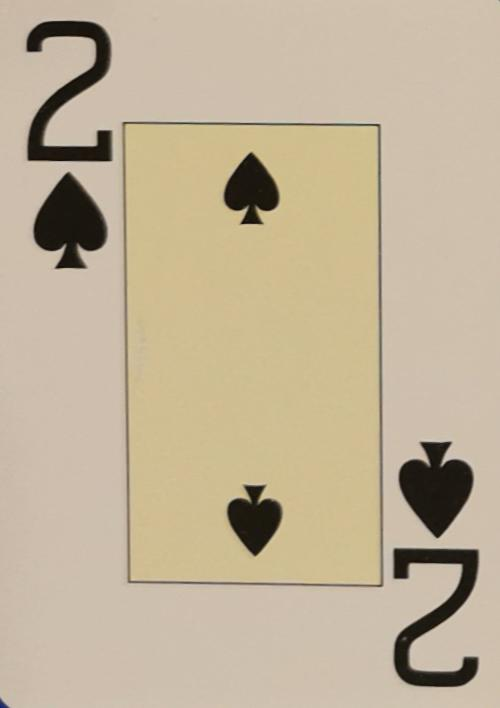

3s


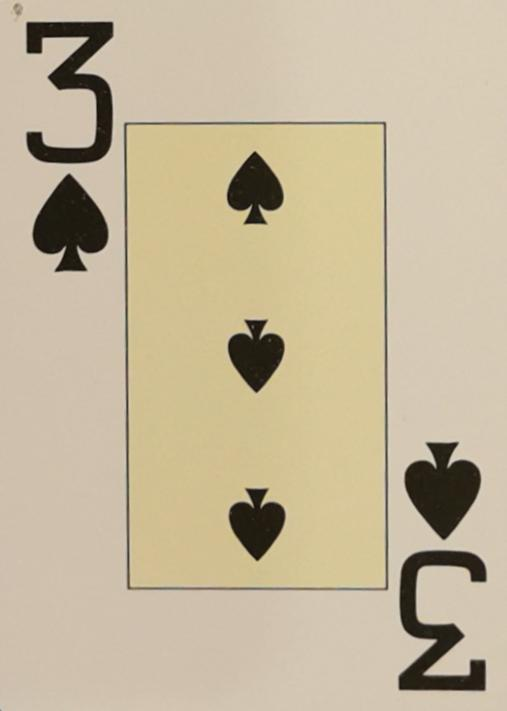

4s


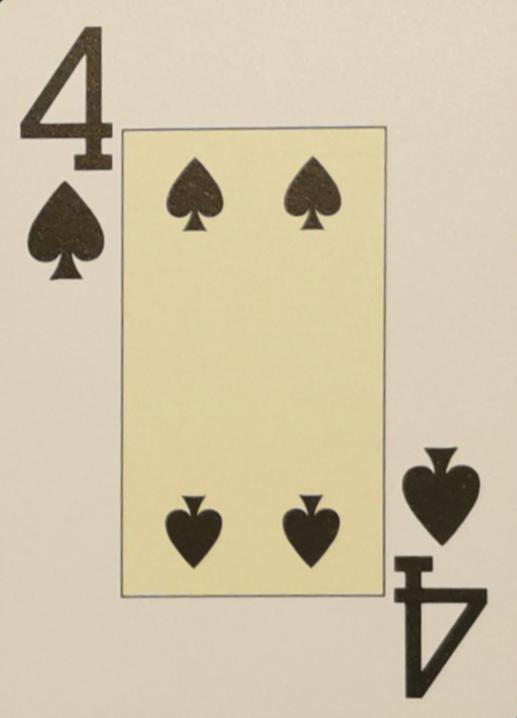

5s


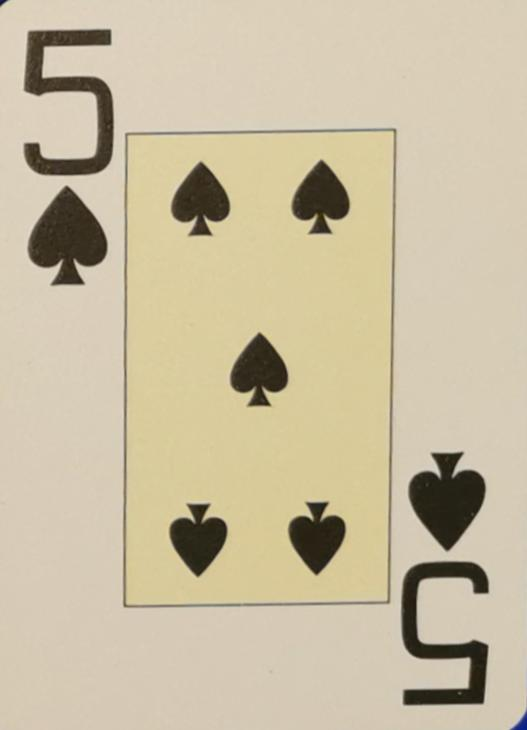

In [118]:
def showarray(image, fmt='jpeg'):
    a = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

def crop_minAreaRect2(img_box, rect):
    margin = 25
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    W = rect[1][0]
    H = rect[1][1]

    Xs = [i[0] for i in box]
    Ys = [i[1] for i in box]
    x1 = min(Xs)
    x2 = max(Xs)
    y1 = min(Ys)
    y2 = max(Ys)

    rotated = False
    angle = rect[2]

    if angle > 45:
        angle -= 90
        rotated = True

    center = (int((x1+x2)/2), int((y1+y2)/2))
    size = (int(x2-x1), int(y2-y1))

    M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

    cropped = cv2.getRectSubPix(img_box, size, center)   
    cropped = cv2.warpAffine(cropped, M, size)

    croppedW = W if not rotated else H 
    croppedH = H if not rotated else W

    return cv2.getRectSubPix(cropped, (int(croppedW) - margin, int(croppedH) - margin), (size[0]/2, size[1]/2))


def crop_source(image):
    # gridsize = 10
    # lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # lab_planes = cv2.split(lab)
    # clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(gridsize, gridsize))
    # lab_planes[0] = clahe.apply(lab_planes[0])
    # lab = cv2.merge(lab_planes)
    # image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    blur = cv2.medianBlur(image, 5)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rects = [cv2.minAreaRect(c) for c in contours]
    rects.sort(key=lambda x: x[0][0])
    
    crops = []
    if len(rects) > 0:
        for i, rect in enumerate(rects):
            img_croped = crop_minAreaRect2(image, rect)
            crops.append(img_croped)

            box = cv2.boxPoints(rect)
            box = np.int0(box)

            cv2.drawContours(image, [box], 0, (0, 255, 0), 2)

#     cv2.drawContours(image, contours, -1, (0, 0, 255), 2)                
#     cv2.imshow('thresh', thresh)
#     cv2.imshow('image', image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     cv2.waitKey(1)
    
    return crops

file_card_map = [
    ['7d', '8d'],
    ['Qc', 'Kc', 'Ad', '2d', '3d'],
    ['4d', '5d', '6d', 'Ah', 'Ks'],    
    ['Jc', '10c', '9c', '8c', '7c'],        
    ['6c', '5c', '4c', '3c', '2c'],            
    ['5h', '6h', '7h', '8h', '9h'],            
    ['10h', 'Jh', 'Qh', 'Kh', 'Ac'],            
    ['6s', '7s', '8s', '9s', '10s'],                
    ['Js', 'Qs', '2h', '3h', '4h'],                
    ['9d', '10d', 'Jd', 'Qd', 'Kd'],                
    ['As', '2s', '3s', '4s', '5s'],                
]

for f, row in enumerate(file_card_map):
    strip_image = cv2.imread(os.path.join('src', '{}.jpg'.format(f)))
    for i, crop in enumerate(crop_source(strip_image)):
        print(row[i])
        showarray(crop)
        cv2.imwrite('deck/image-{}-{}.png'.format(f, i), crop)